<a href="https://colab.research.google.com/github/camilaccosta/Dataviz-/blob/main/Projeto_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
atletas = pd.read_csv("athlete_events.csv")
atletas.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

**1.1** Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [4]:
# Removendo linhas incompletas, e atletas sem medalhas, para depois filtrar por brasileiros. 
sem_nan = atletas.dropna()
sem_nan
atletas_medalhistas_brasileiros = sem_nan[sem_nan["Team"] == "Brazil"]
df_atletas_medalhistas_brasileiros = pd.DataFrame(atletas_medalhistas_brasileiros)
df_atletas_medalhistas_brasileiros.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


In [5]:
plt.rcParams['figure.figsize']=15,5 # Parâmetro usado para esticar e/ou aumentar o gráfico. Esta única referência serve para todos os gráficos

Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

**1.2** Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

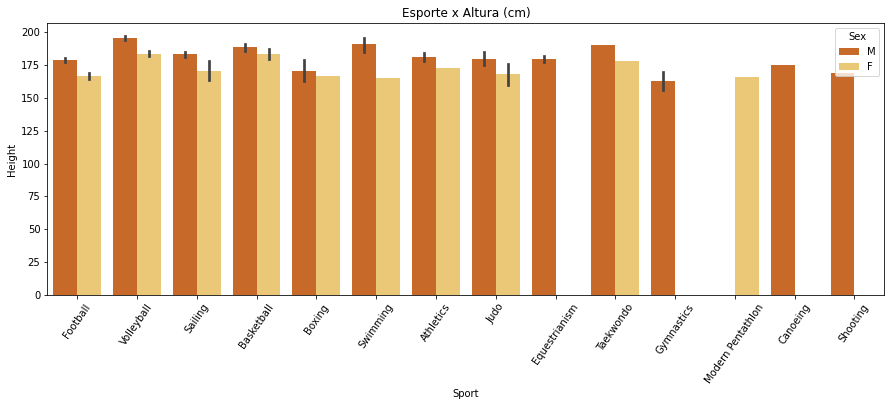

In [6]:
# Plotando o gráfico utilizando df filtrado anteriormente:
height = sns.barplot(x="Sport", y="Height", data=df_atletas_medalhistas_brasileiros, hue="Sex", palette='YlOrBr_r');
plt.title("Esporte x Altura (cm)", loc="center");
height.set_xticklabels(height .get_xticklabels(), rotation=55) # Rotacionar as categorias no eixo X
height;

**1.3** Agora gere um gráfico semelhante ilustrando o peso dos atletas.

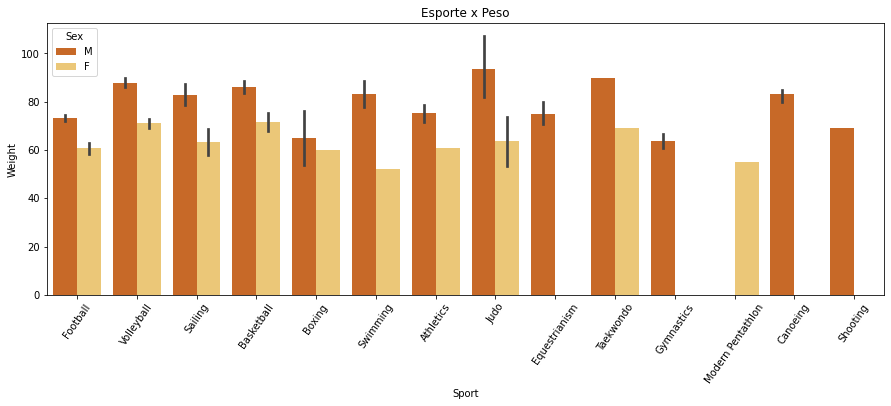

In [7]:
#RESPOSTA 1.3: 
# Plotando o gráfico utilizando df filtrado anteriormente:
weight = sns.barplot(x="Sport", y="Weight", data=df_atletas_medalhistas_brasileiros, hue="Sex", palette='YlOrBr_r');
plt.title('Esporte x Peso', loc='center');
weight.set_xticklabels(weight.get_xticklabels(), rotation=55) # Rotacionar as categorias no eixo X
weight;

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**.

**1.4** Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [8]:
# Filtrando dataframe novamente, desta vez utilizando groupby e sort_values para encontrar maiores medalhistas.
maiores_medalhistas_brasileiros = atletas_medalhistas_brasileiros.groupby(by=["Name"])["Medal"].size().sort_values(ascending=False).head(4)
maiores_medalhistas_brasileiros 

Name
Torben Schmidt Grael                  5
Robert Scheidt                        5
Gustavo Frana Borges                  4
Srgio "Escadinha" Dutra dos Santos    4
Name: Medal, dtype: int64

In [9]:
lista = atletas_medalhistas_brasileiros.groupby(by=["Name", "Medal"]).size().sort_values(ascending=False)
lista.head(65)

Name                             Medal 
Ademir Roque Kaefer              Silver    2
Carmo "Rosa Branca" de Souza     Bronze    2
Dante Guimares Santos do Amaral  Silver    2
Daniela Alves Lima               Silver    2
Paula Renata Marques Pequeno     Gold      2
                                          ..
Flvio Vianna de Ulha Canto       Bronze    1
Alexander Welter                 Gold      1
Flvio da Conceio                 Bronze    1
Fernanda Garay Rodrigues         Gold      1
Alex Sandro da Silva             Bronze    1
Length: 65, dtype: int64

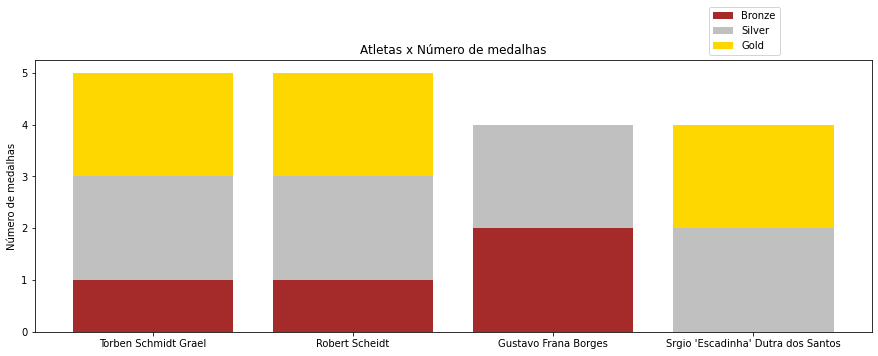

In [10]:
# Agora, plotando o gráfico:
ouro =  [2, 2, 0, 2]
prata = [2, 2, 2, 2]
bronze =[1, 1, 2, 0]

nomes =["Torben Schmidt Grael", "Robert Scheidt", "Gustavo Frana Borges", "Srgio 'Escadinha' Dutra dos Santos"]

plt.bar(nomes,bronze,color="brown",label="Bronze")
plt.bar(nomes,prata,color="silver",bottom=np.array(bronze),label="Silver")
plt.bar(nomes,ouro,color="gold",bottom=np.array(bronze)+np.array(prata),label="Gold")

plt.title("Atletas x Número de medalhas")
plt.ylabel("Número de medalhas")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

**1.5** Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [11]:
# Filtrando df Original:
df_atletas_brasil = atletas.copy()
df_atletas_brasil = df_atletas_brasil[df_atletas_brasil['Team']=='Brazil']
df_atletas_medalhas_brasil = df_atletas_brasil.dropna()
df_atletas_medalhas_brasil = df_atletas_medalhas_brasil.filter(items=['Sport','Event','Year','Medal'])
df_atletas_medalhas_brasil.drop_duplicates(inplace=True)

# Agrupando por esporte e 
series_esport_medalhas = df_atletas_medalhas_brasil.groupby('Sport')['Medal'].value_counts()
series_esport_medalhas
df_esportes = pd.DataFrame(series_esport_medalhas)

df_esportes_brasil = df_esportes.unstack('Medal').fillna(0)

# Arrumando multi-index:
df_esportes_brasil = df_esportes_brasil.T.reset_index(drop=True)
df_esportes_brasil = df_esportes_brasil.T

dict = {
    0: 'Bronze',
    1: 'Gold',
    2: 'Silver'
}
df_esportes_brasil.rename(columns=dict, inplace = True)
df_esportes_brasil = df_esportes_brasil[['Bronze', 'Silver', 'Gold']]
df_esportes_brasil.reset_index(inplace=True)
df_esportes_brasil.head(5)

,Sport,Bronze,Silver,Gold
0,Athletics,8.0,3.0,5.0
1,Basketball,4.0,1.0,0.0
2,Boxing,3.0,1.0,1.0
3,Canoeing,1.0,2.0,0.0
4,Equestrianism,2.0,0.0,1.0


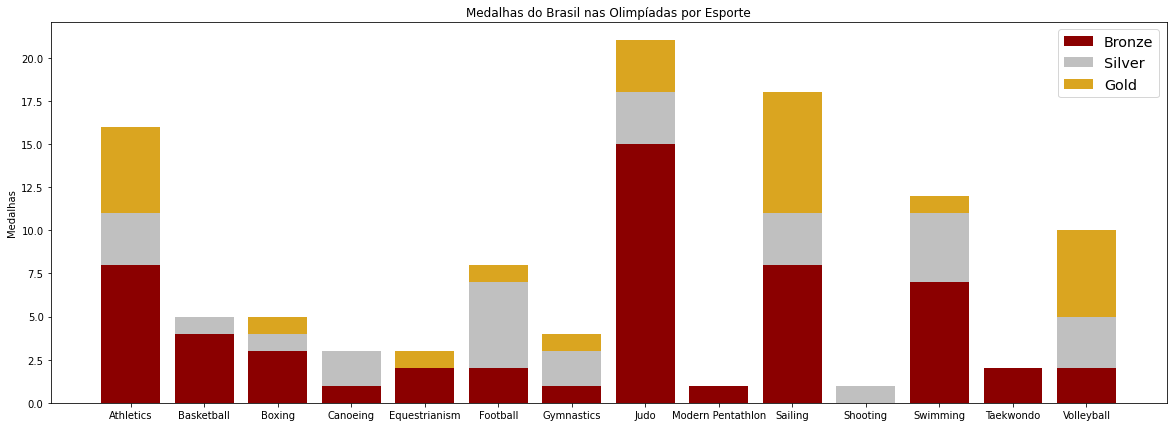

In [12]:
# Agora plotamos o gráfico:
plt.figure(figsize=(20,7))
# Plotando as barras empilhadas:
plt.bar(df_esportes_brasil['Sport'], df_esportes_brasil['Bronze'], color ='darkred', label='Bronze')
plt.bar(df_esportes_brasil['Sport'], df_esportes_brasil['Silver'],bottom= df_esportes_brasil['Bronze'], color ='silver', label="Silver")
plt.bar(df_esportes_brasil['Sport'], df_esportes_brasil['Gold'],bottom= df_esportes_brasil['Bronze']+df_esportes_brasil['Silver'], color ='goldenrod', label="Gold")

# Ajustando configurações do gráfico:
plt.title("Medalhas do Brasil nas Olimpíadas por Esporte")
plt.legend(fontsize='x-large')
plt.ylabel("Medalhas")
plt.show();

**1.6** Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

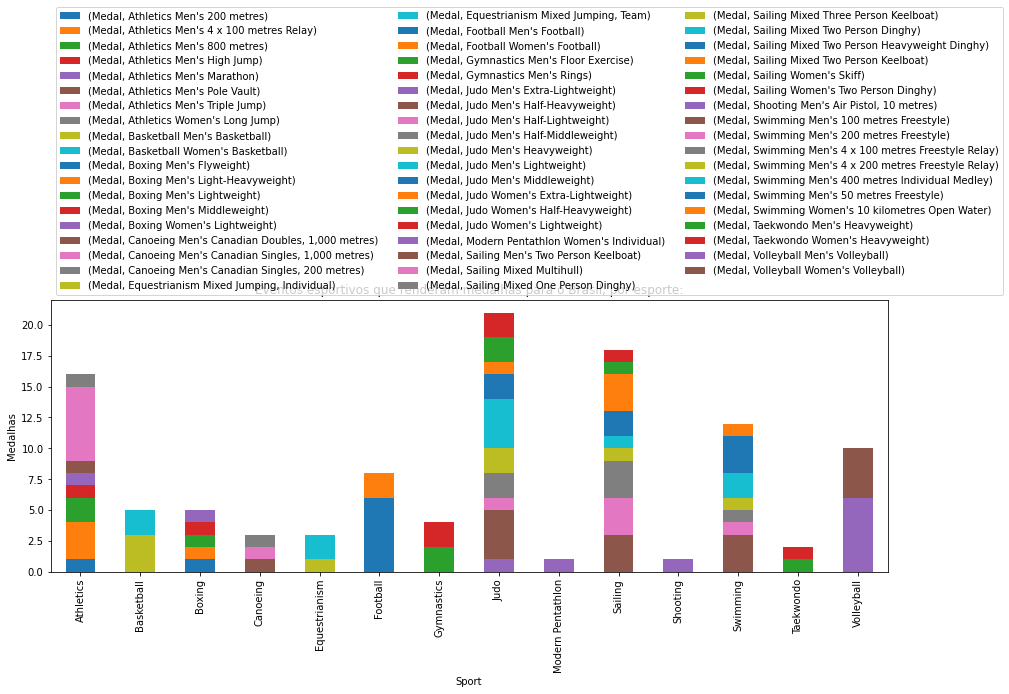

In [13]:
# Filtrando DF, removendo entradas duplicadas:
df_medalhas_brasil = df_atletas_medalhistas_brasileiros.drop_duplicates(subset=['Medal', 'Event', 'Games']).copy()
df_eventos_brasil = df_medalhas_brasil.filter(items = ['Sport', 'Event', 'Medal'])
df_eventos_brasil = df_eventos_brasil.groupby(by=['Sport', 'Event']).count()

df_2 = df_eventos_brasil.unstack('Event').fillna(0)

# Plotando e configurando grafico:
df_2.plot(kind = 'bar', stacked = True)
plt.legend(ncol=3, loc="lower left", bbox_to_anchor=(0, 1))
plt.title('Eventos esportivos que renderam medalhas para o Brasil, por esporte:')
plt.ylabel('Medalhas')
plt.show();

**1.7** Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [14]:
df_eventos_brasil.head(5)

Medal
Sport     Event                                      
Athletics Athletics Men's 200 metres                1
          Athletics Men's 4 x 100 metres Relay      3
          Athletics Men's 800 metres                2
          Athletics Men's High Jump                 1
          Athletics Men's Marathon                  1

In [15]:
# Filtrando dataframe:
df_medalhas_brasil = df_atletas_medalhistas_brasileiros.drop_duplicates(subset=['Medal', 'Event', 'Games']).copy()
colunas_selecionadas= ['Sport','Medal']
melhadas_por_esporte =df_medalhas_brasil.filter(items= colunas_selecionadas)

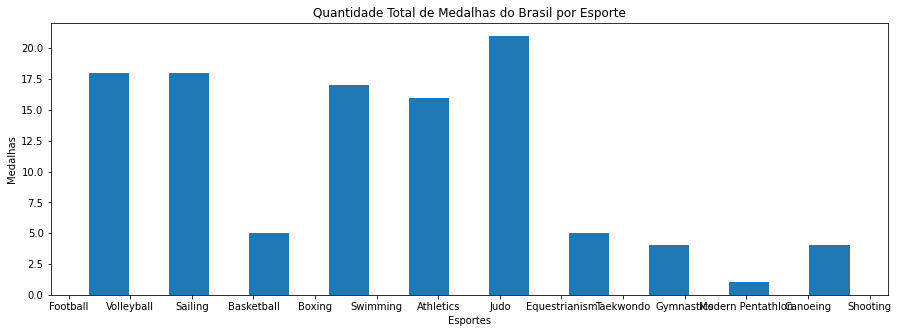

In [16]:
#Resposta 1.7 (HISTOGRAMA):
# Plotando Histograma:
histograma=plt.hist(melhadas_por_esporte['Sport'], rwidth=0.5, stacked = True, align='mid')

plt.title("Quantidade Total de Medalhas do Brasil por Esporte")
plt.xlabel("Esportes")
plt.ylabel("Medalhas")
plt.show()

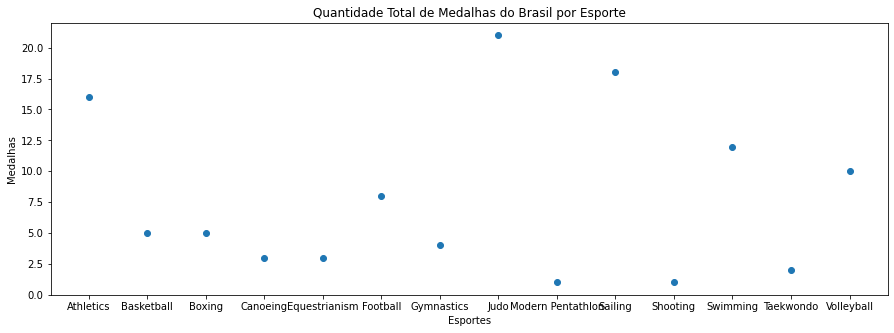

In [ ]:
#Resposta 1.7 (Gráfico de Dispersão com pontos):
df_medalhas_brasil = df_atletas_medalhistas_brasileiros.drop_duplicates(subset=['Medal', 'Event', 'Games']).copy()
df_eventos_brasil = df_medalhas_brasil.filter(items = ['Sport', 'Event', 'Medal'])
df_eventos_brasil = df_eventos_brasil.groupby(by=['Sport']).count()
df_eventos_brasil.reset_index(inplace = True)

x=df_eventos_brasil['Sport']
y=df_eventos_brasil['Medal']

plt.scatter(x,y)
plt.title("Quantidade Total de Medalhas do Brasil por Esporte")
plt.xlabel("Esportes")
plt.ylabel("Medalhas")
plt.show()

**1.8** Repita o procedimento acima, mas com medalhas de ouro.

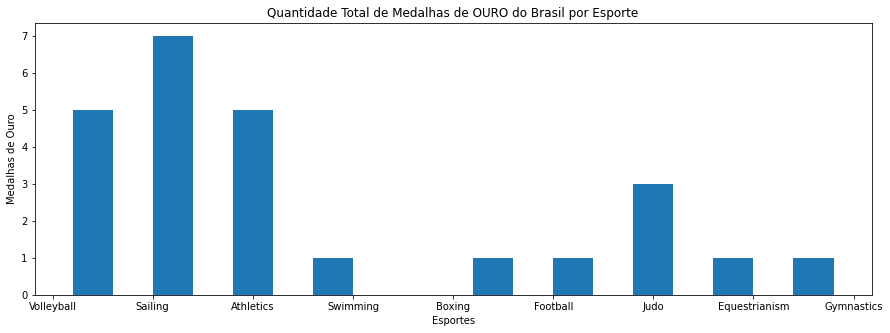

In [17]:
#Resposta 1.8 (HISTOGRAMA):

#Filtrando os dados relevantes:
df_medalhas_brasil = df_atletas_medalhistas_brasileiros.drop_duplicates(subset=['Medal', 'Event', 'Games']).copy()
colunas_selecionadas= ['Sport','Medal']
melhadas_por_esporte =df_medalhas_brasil.filter(items= colunas_selecionadas)
melhadas_de_ouro_por_esporte= melhadas_por_esporte[melhadas_por_esporte['Medal']=='Gold']

#Criando o gráfico:
plt.hist(melhadas_de_ouro_por_esporte['Sport'], rwidth=0.5)
plt.title("Quantidade Total de Medalhas de OURO do Brasil por Esporte")
plt.xlabel("Esportes")
plt.ylabel("Medalhas de Ouro")
plt.show()

In [18]:
melhadas_de_ouro_por_esporte.head(5)

,Sport,Medal
1668,Volleyball,Gold
5930,Volleyball,Gold
6760,Volleyball,Gold
9260,Volleyball,Gold
22613,Sailing,Gold


**1.9** Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [19]:
# Organizando DataFrame:
melhadas_de_ouro_por_esporte = melhadas_de_ouro_por_esporte.groupby(['Sport']).count()

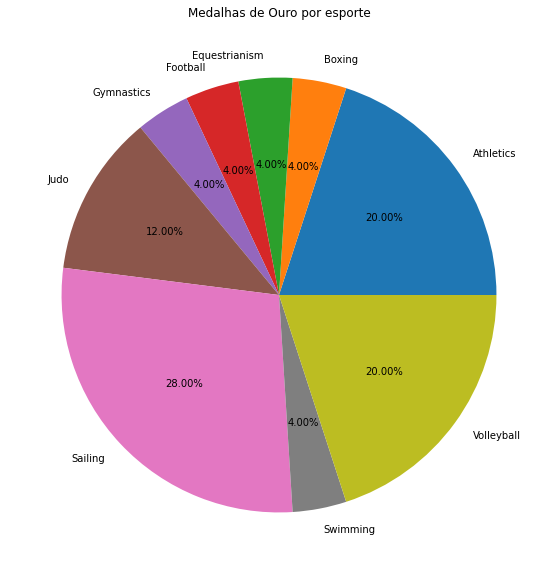

In [22]:
#Resposta 1.9:
#.pie: gráfico de pizza, parâmetro: Medalhas

plt.pie(melhadas_de_ouro_por_esporte['Medal'], labels=melhadas_de_ouro_por_esporte.index , autopct= '%1.2f%%') 
plt.title("Medalhas de Ouro por esporte")
plt.rcParams['figure.figsize']=20,10

In [21]:
melhadas_de_ouro_por_esporte

,Medal
Sport,
Athletics,5
Boxing,1
Equestrianism,1
Football,1
Gymnastics,1
Judo,3
Sailing,7
Swimming,1
Volleyball,5


**1.10** Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [23]:
colunas_selecionadas2=['Games','Medal']
df_medalhas_brasil = df_medalhas_brasil.filter(items= colunas_selecionadas2)

In [24]:
medalhas_edicao = df_medalhas_brasil.sort_values(by='Games')

In [25]:
medalha_ouro= medalhas_edicao[medalhas_edicao['Medal']=='Gold']
medalha_ouro= medalha_ouro.groupby(['Games']).count()

medalha_prata= medalhas_edicao[medalhas_edicao['Medal']=='Silver']
medalha_prata= medalha_prata.groupby(['Games']).count()

medalha_bronze= medalhas_edicao[medalhas_edicao['Medal']=='Bronze']
medalha_bronze =medalha_bronze.groupby(['Games']).count()

In [26]:
medalhas_por_games= medalhas_edicao.groupby(['Games']).count()

In [27]:
#MEDALHAS DE OURO POR EDIÇÃO(GAMES)
medalha_ouro.head(5)

,Medal
Games,
1952 Summer,1
1956 Summer,1
1980 Summer,2
1984 Summer,1
1988 Summer,1


In [28]:
#MEDALHAS DE PRATA POR EDIÇÃO(GAMES)
medalha_prata.head(5)

,Medal
Games,
1968 Summer,1
1984 Summer,5
1988 Summer,2
1992 Summer,1
1996 Summer,2


In [29]:
#MEDALHAS DE BRONZE POR EDIÇÃO(GAMES)
medalha_bronze.head(5)

,Medal
Games,
1948 Summer,1
1952 Summer,1
1960 Summer,1
1964 Summer,1
1968 Summer,2


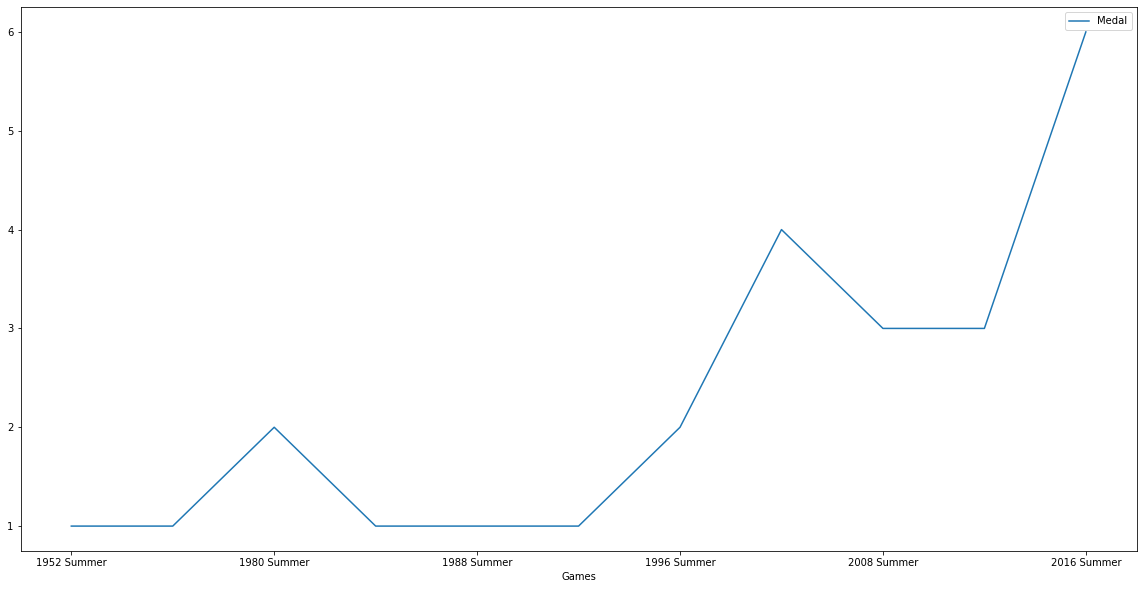

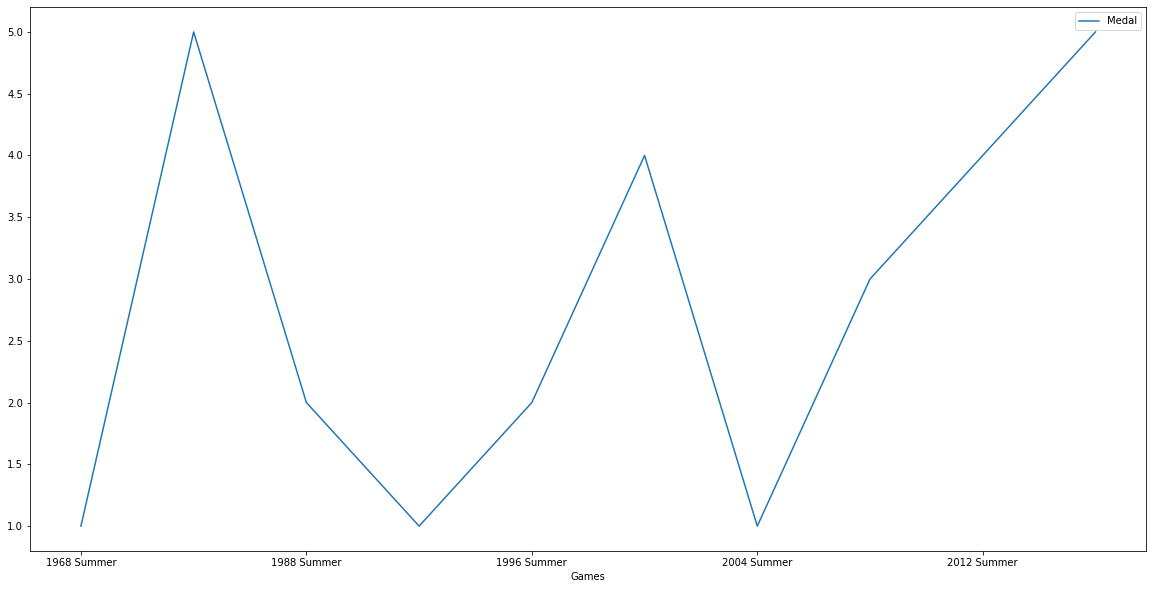

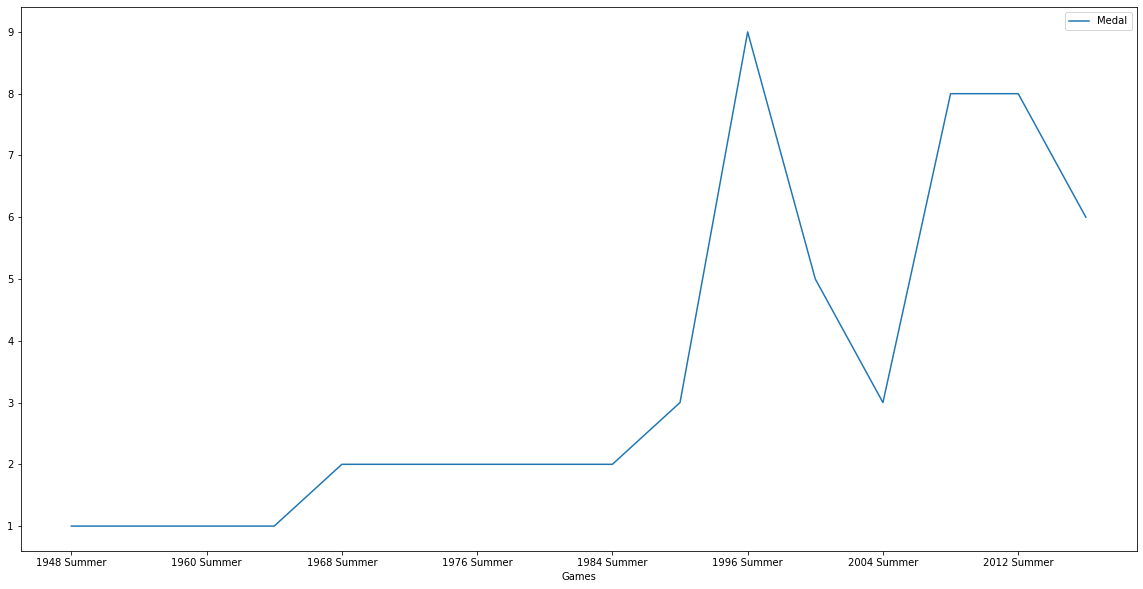

In [30]:
#PLOTANDO OS GRÁFICOS DE MEDALHAS SEPARADOS
medalha_ouro.plot()
medalha_prata.plot()
medalha_bronze.plot()

In [31]:
#ADICIONANDO AS COLUNAS MEDALHAS DE OURO, PRATA E BRONZE NO DATA FRAME MEDALHAS_POR_GAMES
medalhas_por_games['Medalhas de ouro'] = medalha_ouro['Medal']
medalhas_por_games['Medalhas de prata'] = medalha_prata['Medal']
medalhas_por_games['Medalhas de bronze'] = medalha_bronze['Medal']

In [32]:
#EXCLUINDO A COLUNA DE MEDALHAS TOTAIS
medalhas_por_games.drop(columns="Medal")

,Medalhas de ouro,Medalhas de prata,Medalhas de bronze
Games,,,
1948 Summer,NaN,NaN,1.0
1952 Summer,1.0,NaN,1.0
1956 Summer,1.0,NaN,NaN
1960 Summer,NaN,NaN,1.0
1964 Summer,NaN,NaN,1.0
1968 Summer,NaN,1.0,2.0
1972 Summer,NaN,NaN,2.0
1976 Summer,NaN,NaN,2.0
1980 Summer,2.0,NaN,2.0


Text(0, 0.5, 'Edição dos jogos')

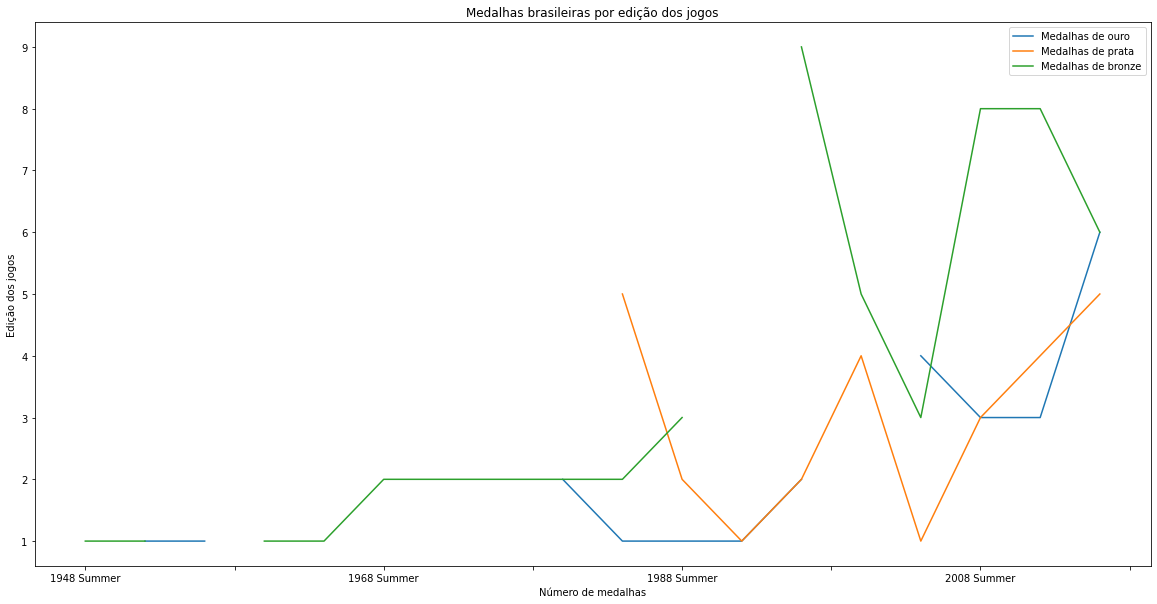

In [33]:
#Resposta 1.10:
medalhas_por_games= medalhas_por_games.drop(columns="Medal")
medalhas_por_games.plot()
plt.title("Medalhas brasileiras por edição dos jogos")
plt.xlabel("Número de medalhas")
plt.ylabel("Edição dos jogos")

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.